# Anaísis del dataset del indicador *Adult education level: 'adult_education_level.csv*.

Cargamos los módulos necesarios:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import requests
import json
from lxml import etree
from bs4 import BeautifulSoup
import math as m
#import wget

Leemos el archivo y mostramos su cabecera:

In [2]:
# Read .csv file
df_level = pd.read_csv('adult_education_level.csv')
df_level.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EDUADULT,BUPPSRY,PC_25_64,A,1989,44.650639,NaN
1,AUS,EDUADULT,BUPPSRY,PC_25_64,A,1991,44.127056,NaN
2,AUS,EDUADULT,BUPPSRY,PC_25_64,A,1993,47.159046,NaN
3,AUS,EDUADULT,BUPPSRY,PC_25_64,A,1994,49.802025,NaN
4,AUS,EDUADULT,BUPPSRY,PC_25_64,A,1995,44.935852,NaN


Vemos qué variables contiene:

In [4]:
# Select variables
columns_level = list(df_level.columns.values)
columns_level

['LOCATION',
 'INDICATOR',
 'SUBJECT',
 'MEASURE',
 'FREQUENCY',
 'TIME',
 'Value',
 'Flag Codes']

Para cada una de las variables, mostramos sus valores únicos:

In [9]:
# Show unique values for variables. Discrete? Continuous?
for column in columns_level:
    temp  = df_level[column].unique()
    print('Unique values for column ' + column + ':' + str(len(temp)))
    print(temp)
    #print('\n')

Unique values for column LOCATION:48
['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'CHN' 'COL' 'EST' 'IDN'
 'ISR' 'LVA' 'RUS' 'SVN' 'ZAF' 'OAVG' 'ARG' 'SAU' 'IND' 'LTU' 'CRI' 'G20']
Unique values for column INDICATOR:1
['EDUADULT']
Unique values for column SUBJECT:7
['BUPPSRY' 'TRY' 'UPPSRY' 'TRY_MEN' 'TRY_WOMEN' 'UPPSRY_MEN'
 'UPPSRY_WOMEN']
Unique values for column MEASURE:1
['PC_25_64']
Unique values for column FREQUENCY:1
['A']
Unique values for column TIME:40
[1989 1991 1993 1994 1995 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 1992 1981 1990 1996 1988 1987 1982 1983 1984 1985 1986]
Unique values for column Value:6967
[44.650639 44.127056 47.159046 ... 32.03635  31.427534 31.72175 ]
Unique values for column Flag Codes:1
[nan]


Veamos cuáles son los tipos de cada variable:

In [5]:
df_level.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME            int64
Value         float64
Flag Codes    float64
dtype: object

## Obtención de metadatos. 

In [6]:
resolver = "https://doi.org/"                                   # DOI resolver
doi = "10.1787/36bce3fe-en"                                     # DOI identifier
headers = {'Accept': 'application/json'}                        # Type of response accepted
r_level_doi = requests.get(resolver + doi, headers = headers)   # POST with headers
print("Status code: %s" % r_level_doi.status_code)              # Display status code

Status code: 200


Convertimos a formato JSON:

In [7]:
json_level_doi = json.loads(r_level_doi.content)

Puesto que el identificador de tipo DOI está basado en HANDLE empleamos el resolvedor http://hdl.handle.net/

In [8]:
resolver = "http://hdl.handle.net/"                              # HANDLE resolver          
doi = "10.1787/36bce3fe-en"                                      # DOI identifier
headers = {'Accept': 'application/json'}                         #Type of response accpeted
r_level_handle = requests.get(resolver + doi, headers = headers) # POST with headers
print("Status code: %s" % r_level_handle.status_code)            # Display status code 

Status code: 200


Convertimos a formato JSON:

In [9]:
json_level_hanlde = json.loads(r_level_handle.content)

Comprobamos si nos han devuelto lo mismo. Comprobamos que las claves obtenidas con el resolvedor doi son subconjunto de las devueltas por el resolvedor handle y viceversa:

In [10]:
[x for x in json_level_doi.keys() if x not in  json_level_hanlde.keys()]

[]

In [11]:
[x for x in json_level_hanlde.keys() if x not in  json_level_doi.keys()]

[]

En lo que sigue, empleamos las devueltas por el resolvedor doi

In [12]:
json_level_doi.keys()

dict_keys(['indexed', 'description', 'reference-count', 'publisher', 'content-domain', 'content-updated', 'DOI', 'type', 'created', 'source', 'is-referenced-by-count', 'title', 'prefix', 'member', 'content-created', 'container-title', 'original-title', 'deposited', 'score', 'subtitle', 'short-title', 'issued', 'references-count', 'URL', 'relation', 'published'])

In [13]:
attribs = ['title', 'description', 'publisher' , 
           'source', 'relation', 'type', 'DOI']

In [14]:
def dublin_core(json_dict, attribs_list):
    for item in attribs_list:
        if item not in list(json_dict.keys()): # If considered attrib is not in the json keys, pass
            pass
        else:
            if item == 'author': # special treatment for key 'author'   
                print('AUTHORS')
                for elem in json_dict['author']:
                    print("Surname: %s" % elem['family'], "; Name: %s" % elem['given'])
            elif item == 'published': # special treatment for key 'published'
                print("Publication date: %s" % str(json_dict['published']['date-parts'][0][0]) + '-' +
                                               str(json_dict['published']['date-parts'][0][1])  + '-' +
                                               str(json_dict['published']['date-parts'][0][2]))
            elif item == 'deposited': # special treatment for key 'deposited'
                print("Deposition date: %s"  % json_dict['deposited']['date-time'])
            else: # rest of keys
                print(item.upper() + ": %s" % json_dict[item])
        print('\n')

In [15]:
dublin_core(json_level_doi, json_level_doi.keys())

INDEXED: {'date-parts': [[2022, 1, 8]], 'date-time': '2022-01-08T16:25:53Z', 'timestamp': 1641659153280}


DESCRIPTION: This indicator looks at adult education level as defined by the highest level of education completed by the 25-64 year-old population. There are three levels: below upper-secondary, upper secondary and tertiary education. Upper secondary education typically follows completion of lower secondary schooling. Lower secondary education completes provision of basic education, usually in a more subject-oriented way and with more specialised teachers. The indicator is measured as a percentage of same age population; for tertiary and upper secondary, data are also broken down by gender.


REFERENCE-COUNT: 0


PUBLISHER: OECD


CONTENT-DOMAIN: {'domain': [], 'crossmark-restriction': False}


CONTENT-UPDATED: {'date-parts': [[2020, 11, 25]]}


DOI: 10.1787/36bce3fe-en


TYPE: dataset


CREATED: {'date-parts': [[2014, 7, 2]], 'date-time': '2014-07-02T12:09:56Z', 'timestamp': 1404

Metadatos para el artículo https://data.oecd.org/eduresource/education-spending.htm#indicator-chart:

In [16]:
resolver = "https://doi.org/"
doi = "10.1787/025421e5-en"
headers = {'Accept': 'application/json'} #Type of response accpeted
r_5 = requests.get(resolver + doi, headers=headers)                    # POST with headers
print("Status code: %s" % r_5.status_code)
json_article = json.loads(r_5.content)

Status code: 200


In [17]:
dublin_core(json_article, json_article.keys())

INDEXED: {'date-parts': [[2021, 12, 21]], 'date-time': '2021-12-21T17:25:56Z', 'timestamp': 1640107556877}


DESCRIPTION: These indicators look at the highest level of education completed by a person. Data are available for adults achieving tertiary education and the educational attainment of adults in different age groups. The level to which adults have studied is often used as a measure of human capital and the level of an individual's skills – in other words the skills available in the population and labour force.


REFERENCE-COUNT: 0


PUBLISHER: OECD


CONTENT-DOMAIN: {'domain': [], 'crossmark-restriction': False}


CONTENT-UPDATED: {'date-parts': [[2018, 12, 18]]}


DOI: 10.1787/025421e5-en


TYPE: None


CREATED: {'date-parts': [[2014, 7, 2]], 'date-time': '2014-07-02T12:09:56Z', 'timestamp': 1404302996000}


SOURCE: Crossref


IS-REFERENCED-BY-COUNT: 0


TITLE: Education attainment


PREFIX: 10.1787


MEMBER: 1963


CONTENT-CREATED: {'date-parts': [[2017, 11, 18]]}


CONTAINER-

  
 ## Análisis preiminar
 
 ### Educational attainment of 25-64 year-olds (2018)
 
 Veamos, para cada pais, el porcentaje de nivel educativo alcanzado en 2018 para cada uno de los nivelees:

Filtrmos por año y eliminamos las columnas que no nos interesan:

In [18]:
df_level_2018 = df_level[df_level['TIME'] == 2018].\
                    drop(['FREQUENCY', 'Flag Codes', 'INDICATOR', 'MEASURE', 'TIME'], axis = 1)

Pivotamos

In [19]:
df_level_2018 = df_level_2018.pivot_table(values = 'Value',
                              index = 'LOCATION',
                              columns='SUBJECT',
                              aggfunc='first').sort_values('BUPPSRY')

In [20]:
df_level_2018

SUBJECT,BUPPSRY,TRY,TRY_MEN,TRY_WOMEN,UPPSRY,UPPSRY_MEN,UPPSRY_WOMEN
LOCATION,,,,,,,
RUS,4.802298,56.725521,49.234489,63.460545,38.472183,45.109924,32.504326
CZE,6.139409,24.262077,22.450584,26.133144,69.598511,72.602074,66.496178
LTU,7.022464,41.654594,33.979832,48.837761,51.322941,56.734547,46.257969
POL,7.552199,30.919592,25.205914,36.574348,61.528210,66.904831,56.207031
CAN,8.377914,57.888363,51.314053,64.394012,33.733723,38.883816,28.637413
SVK,8.421120,24.583420,20.983791,28.216055,66.995461,71.502182,62.447418
USA,9.176164,47.431145,44.312847,50.435326,43.392693,45.757004,41.114902
EST,10.810427,41.130722,30.904222,51.221062,48.058849,54.846138,41.361931
FIN,10.926194,45.188133,37.464184,53.070175,43.885674,48.997135,38.669590


Graficamos como gráfic de barras:

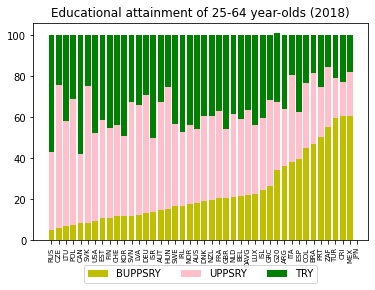

In [33]:
p1 = plt.bar(df_level_2018.index, df_level_2018['BUPPSRY'], color = 'y', label = "BUPPSRY")

p2 = plt.bar(df_level_2018.index, df_level_2018['UPPSRY'],
             bottom = df_level_2018['BUPPSRY'],
             color = 'pink', label = 'UPPSRY')

p3 = plt.bar(df_level_2018.index, df_level_2018['TRY'],
             bottom = np.array(df_level_2018['BUPPSRY']) + np.array(df_level_2018['UPPSRY']),
             color='g', label = 'TRY')


plt.xticks(rotation = 90, fontsize = 7)
plt.legend(loc="upper left")
plt.title("Educational attainment of 25-64 year-olds (2018)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), ncol=3)
plt.savefig('./images/level.1.png')

plt.show()

#  Tertiary attainment women vs men (1981-2020)

Analizamos la evocución histórica de la educación terciaria. 

Filtramos las columnas que nos interesan y despreciamos el resto:

In [22]:
df_gender_try = df_level[df_level['SUBJECT'].isin(['TRY_MEN', 'TRY_WOMEN'])].\
                    drop(['FREQUENCY', 'Flag Codes', 'INDICATOR', 'MEASURE'], axis = 1)

Nos quedamos con los indicadores para mujeres:

In [23]:
df_gender_try_women = df_gender_try[df_gender_try['SUBJECT'] == 'TRY_WOMEN']

Vreamos un heatmap. En el eje horizontal, situamos la dimensión temporal (medida en años). En el eje vertical, situámos la dimensión espacial (los países). Cada una de las casillas indica el porcentaje de mujeres con educación superior en el pañis y el año indicados por los ejes.

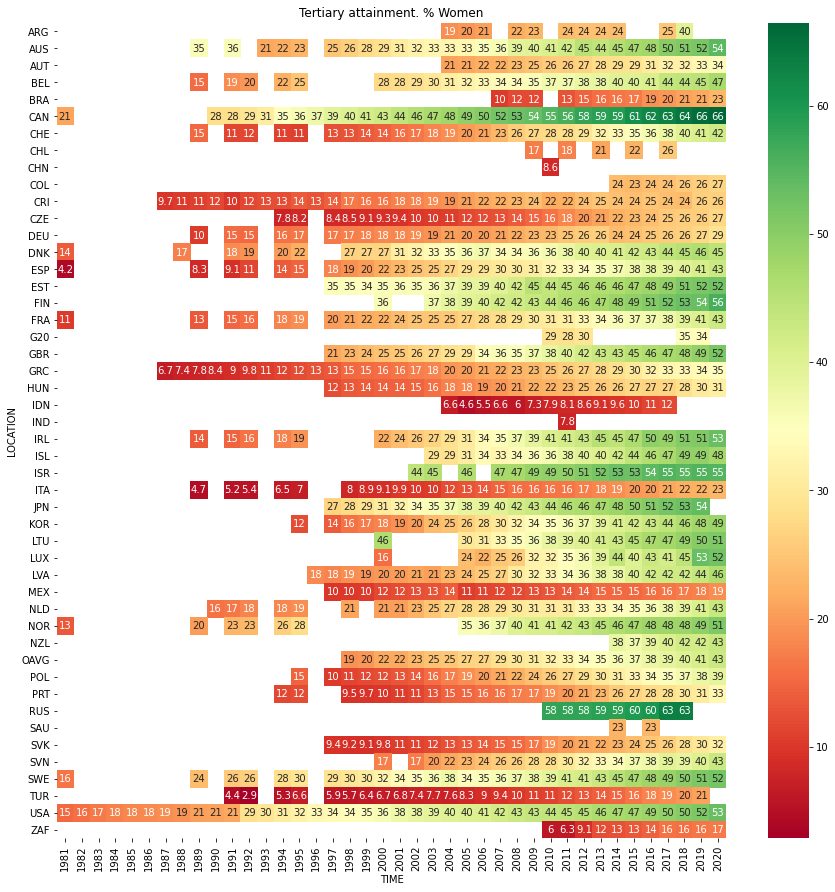

In [24]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sns.heatmap(df_gender_try_women.pivot("LOCATION", "TIME", "Value"),
            ax = ax,
            annot = True,
            cmap="RdYlGn")

plt.title("Tertiary attainment. % Women")
plt.savefig('./images/level.2.png')

plt.show()

Repetimos para hombres:

In [25]:
df_gender_try_men = df_gender_try[df_gender_try['SUBJECT'] == 'TRY_MEN']

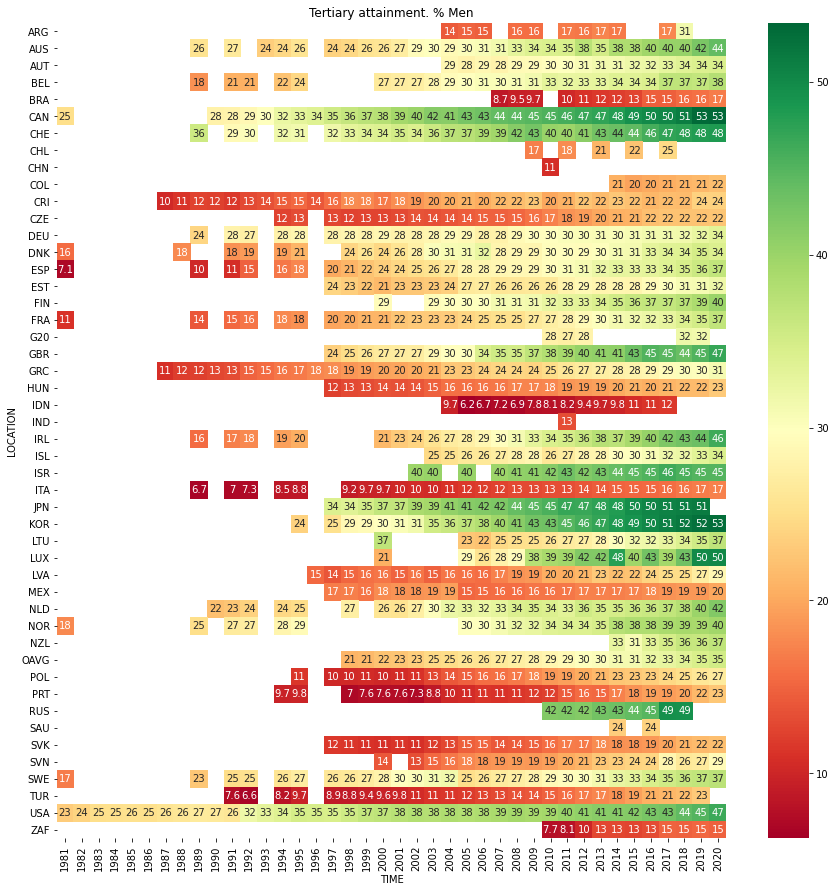

In [26]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sns.heatmap(df_gender_try_men.pivot("LOCATION", "TIME", "Value"), 
            ax = ax, 
            annot = True,
            cmap = "RdYlGn")
plt.title("Tertiary attainment. % Men")
plt.savefig('./images/level.3.png')
plt.show()

Estudiamos la diferencia hombres - mujeres:

In [27]:
df_gender_tre_wm = df_gender_try.pivot_table(values = 'Value',
                           index = ['LOCATION', 'TIME'],
                           columns = 'SUBJECT',
                           aggfunc = 'first')

In [28]:
df_gender_tre_wm['M-W'] = df_gender_tre_wm['TRY_MEN'] - df_gender_tre_wm['TRY_WOMEN']

In [29]:
df_gender_tre_wm

SUBJECT          TRY_MEN  TRY_WOMEN       M-W
LOCATION TIME                                
ARG      2004  14.196757  18.869257 -4.672500
         2005  15.078322  19.570387 -4.492065
         2006  14.619519  20.699968 -6.080449
         2008  15.806544  21.795214 -5.988670
         2009  15.809969  22.821455 -7.011486
...                  ...        ...       ...
ZAF      2016  13.194118  14.389567 -1.195449
         2017  14.916240  16.052650 -1.136410
         2018  14.855694  15.901568 -1.045874
         2019  15.127214  16.446951 -1.319737
         2020  14.797209  16.851519 -2.054310

[1005 rows x 3 columns]

In [30]:
df_gender_tre_wm.reset_index()

SUBJECT,LOCATION,TIME,TRY_MEN,TRY_WOMEN,M-W
0,ARG,2004,14.196757,18.869257,-4.672500
1,ARG,2005,15.078322,19.570387,-4.492065
2,ARG,2006,14.619519,20.699968,-6.080449
3,ARG,2008,15.806544,21.795214,-5.988670
4,ARG,2009,15.809969,22.821455,-7.011486
...,...,...,...,...,...
1000,ZAF,2016,13.194118,14.389567,-1.195449
1001,ZAF,2017,14.916240,16.052650,-1.136410
1002,ZAF,2018,14.855694,15.901568,-1.045874
1003,ZAF,2019,15.127214,16.446951,-1.319737


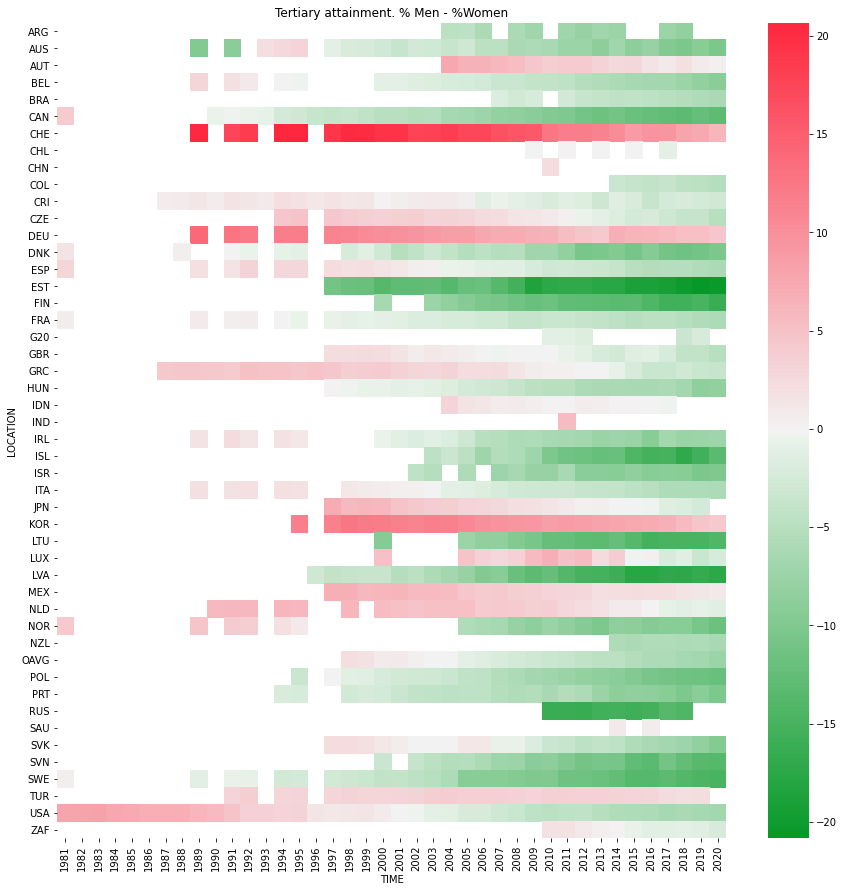

In [31]:
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sns.heatmap(df_gender_tre_wm.reset_index().pivot("LOCATION", "TIME", "M-W"), 
            ax = ax, 
            #annot = True,
            cmap= rdgn)

plt.title("Tertiary attainment. % Men - %Women")
plt.savefig('./images/level.4.png')
plt.show()